



# **Machine Learning**

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import string
from wordcloud import WordCloud
import pickle
from google.colab import files
# Download stopwords dan tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import gdown

# URL file Google Drive yang sudah dikoreksi
url_hoax = "https://drive.google.com/uc?id=15ERZ38msp1ADHclnJIV_dsQFG-nfhHNd"
url_non_hoax = "https://drive.google.com/uc?id=1YyOYmsMUGeGBQww6Uo5ay_5tXHWkLQTq"

# Download file scraping_berita_hoax.csv
gdown.download(url_hoax, "scraping_berita_hoax.csv", quiet=False)

# Download file scraping_non_hoax_data.csv
gdown.download(url_non_hoax, "scraping non hoax_data baru.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=15ERZ38msp1ADHclnJIV_dsQFG-nfhHNd
To: /content/scraping_berita_hoax.csv
100%|██████████| 1.57M/1.57M [00:00<00:00, 33.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YyOYmsMUGeGBQww6Uo5ay_5tXHWkLQTq
To: /content/scraping non hoax_data baru.csv
100%|██████████| 818k/818k [00:00<00:00, 15.9MB/s]


'scraping non hoax_data baru.csv'

In [ ]:
df_hoax = pd.read_csv('scraping_berita_hoax.csv')
df_non_hoax = pd.read_csv('scraping non hoax_data baru.csv')

#Cleaning Text

In [ ]:
  df_hoax.info()
  df_non_hoax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   7225 non-null   object
 1   Date    7225 non-null   object
 2   Author  7225 non-null   object
 3   URL     7225 non-null   object
dtypes: object(4)
memory usage: 225.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10032 non-null  int64 
 1   Title   10032 non-null  object
 2   Date    10032 non-null  object
dtypes: int64(1), object(2)
memory usage: 235.2+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Menghapus baris yang memiliki nilai yang sama
df_hoax.drop_duplicates()
# Menampilkan DataFrame setelah penghapusan duplikat
df_hoax.head()

,Title,Date,Author,URL
0,[SALAH] Masker dapat Menyebabkan Infeksi Staph,"Agustus 31, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/31/salah-maske...
1,"[SALAH] Soal Tuduhan Jokowi Anti Islam, Luhut:...","Agustus 31, 2020",Syarief Ramaputra,https://turnbackhoax.id/2020/08/31/salah-soal-...
2,[SALAH] Razia Masker Serentak Dengan Denda Rp2...,"Agustus 31, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/31/salah-razia...
3,[SALAH] “RISMA DIBAPTIS DI GEREJA … ? Innalill...,"Agustus 31, 2020",Adi Syafitrah,https://turnbackhoax.id/2020/08/31/salah-risma...
4,[SALAH] Bantuan Covid-19 oleh BRI Melalui BRIVA,"Agustus 31, 2020",Bentang Febrylian,https://turnbackhoax.id/2020/08/31/salah-bantu...


In [ ]:
df_non_hoax.drop_duplicates()
df_non_hoax.head()

,id,Title,Date
0,1,"Gapura Sumedang Kembali Disorot Warganet, Ada ...",8/1/2020
1,2,Terpopuler di Jateng: Harta Karun Emas Puluhan...,8/1/2020
2,3,Polisi Hong Kong AkanÂ Tangkap Aktivis Pro Dem...,8/1/2020
3,4,Posko Pengaduan Predator Fetish Pocong Unair T...,8/1/2020
4,5,"Ditegur Mendagri, Pasha: Terima Kasih Sudah Pe...",8/1/2020


In [ ]:
df_hoax = df_hoax[['Title']].copy()
df_non_hoax = df_non_hoax[['Title']].copy()

df_hoax.info()
df_non_hoax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   7225 non-null   object
dtypes: object(1)
memory usage: 56.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10032 non-null  object
dtypes: object(1)
memory usage: 78.5+ KB


In [ ]:
# Load dataset hoax
df_hoax = pd.read_csv('scraping_berita_hoax.csv')
df_hoax['label'] = 1  # hoax

# Load dataset non-hoax
df_non_hoax = pd.read_csv('scraping non hoax_data baru.csv')
df_non_hoax['label'] = 0  # non-hoax

# Gabungkan dataset
df_combined = pd.concat([df_hoax, df_non_hoax], ignore_index=True)

# Simpan dataset yang telah digabungkan menjadi file CSV
df_combined.to_csv('combined_hoax_non_hoax.csv', index=False)

# Download file hasil penggabungan
from google.colab import files
files.download('combined_hoax_non_hoax.csv')

# Tampilkan beberapa baris pertama dari dataset gabungan
print(df_combined.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                               Title              Date  \
0     [SALAH] Masker dapat Menyebabkan Infeksi Staph  Agustus 31, 2020   
1  [SALAH] Soal Tuduhan Jokowi Anti Islam, Luhut:...  Agustus 31, 2020   
2  [SALAH] Razia Masker Serentak Dengan Denda Rp2...  Agustus 31, 2020   
3  [SALAH] “RISMA DIBAPTIS DI GEREJA … ? Innalill...  Agustus 31, 2020   
4    [SALAH] Bantuan Covid-19 oleh BRI Melalui BRIVA  Agustus 31, 2020   

              Author                                                URL  \
0   Muhammad Khairil  https://turnbackhoax.id/2020/08/31/salah-maske...   
1  Syarief Ramaputra  https://turnbackhoax.id/2020/08/31/salah-soal-...   
2   Muhammad Khairil  https://turnbackhoax.id/2020/08/31/salah-razia...   
3      Adi Syafitrah  https://turnbackhoax.id/2020/08/31/salah-risma...   
4  Bentang Febrylian  https://turnbackhoax.id/2020/08/31/salah-bantu...   

   label  id  
0      1 NaN  
1      1 NaN  
2      1 NaN  
3      1 NaN  
4      1 NaN  


In [ ]:
# Fungsi gabungan untuk membersihkan teks
def clean_text(review_text):
    # Hapus teks tertentu, case insensitive
    text = review_text.replace('[SALAH]', '').strip()
    # Ubah teks menjadi huruf kecil
    text = text.lower()
    # Hapus pengulangan karakter
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # Hapus semua tanda baca menggunakan regex untuk memastikan
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
# Fungsi untuk tokenisasi
def word_token(review_text):
    return word_tokenize(review_text)

# Fungsi untuk menghapus stopwords
def remove_stopwords(tokenized_text):
    stop = set(stopwords.words('indonesian'))
    return [word for word in tokenized_text if word not in stop]

In [ ]:
# Terapkan fungsi gabungan untuk membersihkan teks
df_combined['clean_review'] = df_combined['Title'].apply(clean_text)

# Tampilkan hasil
print(df_combined.head())

                                               Title              Date  \
0     [SALAH] Masker dapat Menyebabkan Infeksi Staph  Agustus 31, 2020   
1  [SALAH] Soal Tuduhan Jokowi Anti Islam, Luhut:...  Agustus 31, 2020   
2  [SALAH] Razia Masker Serentak Dengan Denda Rp2...  Agustus 31, 2020   
3  [SALAH] “RISMA DIBAPTIS DI GEREJA … ? Innalill...  Agustus 31, 2020   
4    [SALAH] Bantuan Covid-19 oleh BRI Melalui BRIVA  Agustus 31, 2020   

              Author                                                URL  \
0   Muhammad Khairil  https://turnbackhoax.id/2020/08/31/salah-maske...   
1  Syarief Ramaputra  https://turnbackhoax.id/2020/08/31/salah-soal-...   
2   Muhammad Khairil  https://turnbackhoax.id/2020/08/31/salah-razia...   
3      Adi Syafitrah  https://turnbackhoax.id/2020/08/31/salah-risma...   
4  Bentang Febrylian  https://turnbackhoax.id/2020/08/31/salah-bantu...   

   label  id                                       clean_review  
0      1 NaN             masker dapat 

In [ ]:
# Terapkan tokenisasi
df_combined['tokenized'] = df_combined['clean_review'].apply(word_token)

In [ ]:
# Hapus stopwords
df_combined['stopwords_removed'] = df_combined['tokenized'].apply(remove_stopwords)

In [ ]:
# Gabungkan kembali token yang sudah dibersihkan menjadi satu string
df_combined['clean_review'] = df_combined['stopwords_removed'].apply(lambda x: ' '.join(x))

# Tampilkan hasil pembersihan
df_combined[['Title', 'clean_review']].head(10)

,Title,clean_review
0,[SALAH] Masker dapat Menyebabkan Infeksi Staph,masker menyebabkan infeksi staph
1,"[SALAH] Soal Tuduhan Jokowi Anti Islam, Luhut:...",tuduhan jokowi anti islam luhut umur 10 beliau...
2,[SALAH] Razia Masker Serentak Dengan Denda Rp2...,razia masker serentak denda rp25000 wilayah ka...
3,[SALAH] “RISMA DIBAPTIS DI GEREJA … ? Innalill...,risma dibaptis gereja innalillahi wainnailahi ...
4,[SALAH] Bantuan Covid-19 oleh BRI Melalui BRIVA,bantuan covid19 bri briva
5,[SALAH] Biaya Tilang Terbaru di Indonesia,biaya tilang terbaru indonesia
6,[SALAH] “Tak Tahan Sering DI Ejek Jaga Gereja ...,tahan ejek jaga gereja bubarkan pengajian tent...
7,[SALAH] Vaksin Covid Sebabkan Mandul,vaksin covid sebabkan mandul
8,[SALAH] Dokumen WHO Tidak Menganjurkan untuk M...,dokumen who menganjurkan memakai masker pandem...
9,[SALAH] Kisah Azab Kematian Tragis Mustafa Kemal,kisah azab kematian tragis mustafa kemal


In [ ]:
df_combined.head(11)

,Title,Date,Author,URL,label,id,clean_review,tokenized,stopwords_removed
0,[SALAH] Masker dapat Menyebabkan Infeksi Staph,"Agustus 31, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/31/salah-maske...,1,NaN,masker menyebabkan infeksi staph,"[masker, dapat, menyebabkan, infeksi, staph]","[masker, menyebabkan, infeksi, staph]"
1,"[SALAH] Soal Tuduhan Jokowi Anti Islam, Luhut:...","Agustus 31, 2020",Syarief Ramaputra,https://turnbackhoax.id/2020/08/31/salah-soal-...,1,NaN,tuduhan jokowi anti islam luhut umur 10 beliau...,"[soal, tuduhan, jokowi, anti, islam, luhut, um...","[tuduhan, jokowi, anti, islam, luhut, umur, 10..."
2,[SALAH] Razia Masker Serentak Dengan Denda Rp2...,"Agustus 31, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/31/salah-razia...,1,NaN,razia masker serentak denda rp25000 wilayah ka...,"[razia, masker, serentak, dengan, denda, rp250...","[razia, masker, serentak, denda, rp25000, wila..."
3,[SALAH] “RISMA DIBAPTIS DI GEREJA … ? Innalill...,"Agustus 31, 2020",Adi Syafitrah,https://turnbackhoax.id/2020/08/31/salah-risma...,1,NaN,risma dibaptis gereja innalillahi wainnailahi ...,"[risma, dibaptis, di, gereja, innalillahi, wai...","[risma, dibaptis, gereja, innalillahi, wainnai..."
4,[SALAH] Bantuan Covid-19 oleh BRI Melalui BRIVA,"Agustus 31, 2020",Bentang Febrylian,https://turnbackhoax.id/2020/08/31/salah-bantu...,1,NaN,bantuan covid19 bri briva,"[bantuan, covid19, oleh, bri, melalui, briva]","[bantuan, covid19, bri, briva]"
5,[SALAH] Biaya Tilang Terbaru di Indonesia,"Agustus 31, 2020",Bentang Febrylian,https://turnbackhoax.id/2020/08/31/salah-biaya...,1,NaN,biaya tilang terbaru indonesia,"[biaya, tilang, terbaru, di, indonesia]","[biaya, tilang, terbaru, indonesia]"
6,[SALAH] “Tak Tahan Sering DI Ejek Jaga Gereja ...,"Agustus 31, 2020",Adi Syafitrah,https://turnbackhoax.id/2020/08/31/salah-tak-t...,1,NaN,tahan ejek jaga gereja bubarkan pengajian tent...,"[tak, tahan, sering, di, ejek, jaga, gereja, d...","[tahan, ejek, jaga, gereja, bubarkan, pengajia..."
7,[SALAH] Vaksin Covid Sebabkan Mandul,"Agustus 30, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/30/salah-vaksi...,1,NaN,vaksin covid sebabkan mandul,"[vaksin, covid, sebabkan, mandul]","[vaksin, covid, sebabkan, mandul]"
8,[SALAH] Dokumen WHO Tidak Menganjurkan untuk M...,"Agustus 30, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/30/salah-dokum...,1,NaN,dokumen who menganjurkan memakai masker pandem...,"[dokumen, who, tidak, menganjurkan, untuk, mem...","[dokumen, who, menganjurkan, memakai, masker, ..."
9,[SALAH] Kisah Azab Kematian Tragis Mustafa Kemal,"Agustus 30, 2020",Muhammad Khairil,https://turnbackhoax.id/2020/08/30/salah-kisah...,1,NaN,kisah azab kematian tragis mustafa kemal,"[kisah, azab, kematian, tragis, mustafa, kemal]","[kisah, azab, kematian, tragis, mustafa, kemal]"


In [ ]:
# Terapkan tokenisasi, hapus stopwords, dan gabungkan kembali token menjadi satu string
df_combined['tokenized'] = df_combined['clean_review'].apply(word_token)
df_combined['stopwords_removed'] = df_combined['tokenized'].apply(remove_stopwords)
df_combined['clean_review'] = df_combined['stopwords_removed'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dari setiap langkah
print("Hasil Tokenisasi:")
print(df_combined[['Title', 'tokenized']].head(10))

print("\nHasil Setelah Stopwords Dihapus:")
print(df_combined[['Title', 'stopwords_removed']].head(10))

print("\nHasil Setelah Token Digabungkan:")
print(df_combined[['Title', 'clean_review']].head(10))

Hasil Tokenisasi:
                                               Title  \
0     [SALAH] Masker dapat Menyebabkan Infeksi Staph   
1  [SALAH] Soal Tuduhan Jokowi Anti Islam, Luhut:...   
2  [SALAH] Razia Masker Serentak Dengan Denda Rp2...   
3  [SALAH] “RISMA DIBAPTIS DI GEREJA … ? Innalill...   
4    [SALAH] Bantuan Covid-19 oleh BRI Melalui BRIVA   
5          [SALAH] Biaya Tilang Terbaru di Indonesia   
6  [SALAH] “Tak Tahan Sering DI Ejek Jaga Gereja ...   
7               [SALAH] Vaksin Covid Sebabkan Mandul   
8  [SALAH] Dokumen WHO Tidak Menganjurkan untuk M...   
9   [SALAH] Kisah Azab Kematian Tragis Mustafa Kemal   

                                           tokenized  
0              [masker, menyebabkan, infeksi, staph]  
1  [tuduhan, jokowi, anti, islam, luhut, umur, 10...  
2  [razia, masker, serentak, denda, rp25000, wila...  
3  [risma, dibaptis, gereja, innalillahi, wainnai...  
4                     [bantuan, covid19, bri, briva]  
5                [biaya, tilang, te

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from imblearn.over_sampling import SMOTE
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
# import pandas as pd

# # Asumsikan kita sudah memiliki dataset `df_combined` dengan kolom 'clean_review' dan 'label'
# texts = df_combined['clean_review']
# labels = df_combined['label']

# # Vektorisasi teks menggunakan TF-IDF
# tfidf = TfidfVectorizer(max_features=2000)
# X = tfidf.fit_transform(texts)
# y = labels

# # Membagi data menjadi data latih dan uji
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Menerapkan SMOTE untuk menyeimbangkan data latih
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Melatih model Naive Bayes dengan parameter optimal
# optimal_nb = MultinomialNB(alpha=0.5879497375100787)
# optimal_nb.fit(X_train_smote, y_train_smote)
# y_pred_nb = optimal_nb.predict(X_test)
# nb_score = accuracy_score(y_test, y_pred_nb)

# # Melatih model SVM dengan parameter optimal
# optimal_svm = LinearSVC(C=0.155221171236024, random_state=42)
# optimal_svm.fit(X_train_smote, y_train_smote)
# y_pred_svm = optimal_svm.predict(X_test)
# svm_score = accuracy_score(y_test, y_pred_svm)

# # Membuat DataFrame untuk menampilkan hasil
# results = {
#     'Model': ['Naive Bayes', 'SVM'],
#     'Parameter': ['alpha', 'C'],
#     'Value': [0.5879497375100787, 0.155221171236024],
#     'Score': [nb_score, svm_score]
# }

# results_df = pd.DataFrame(results)
# results_df

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,Model,Parameter,Value,Score
0,Naive Bayes,alpha,0.587950,0.846176
1,SVM,C,0.155221,0.856895


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Vektorisasi TF-IDF

In [ ]:
# Vektorisasi teks menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_combined['clean_review'])
y = df_combined['label']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menggunakan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribusi label sebelum SMOTE: {pd.Series(y_train).value_counts()}")
print(f"Distribusi label setelah SMOTE: {pd.Series(y_train_smote).value_counts()}")

Distribusi label sebelum SMOTE: label
0    8025
1    5780
Name: count, dtype: int64
Distribusi label setelah SMOTE: label
0    8025
1    8025
Name: count, dtype: int64


##Train Model NB FIKS

In [ ]:
!pip install pyswarm

from pyswarm import pso
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=954244f85362bf8df9e28202783f33ff0b605e1ed6a9ad11ee494bc6d2cf1fc6
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
# Fungsi objektif untuk PSO
def objective(params):
    alpha = params[0]
    model = MultinomialNB(alpha=alpha, force_alpha=True)
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Minimalkan nilai negatif dari akurasi

In [ ]:
# Batasan parameter
lb = [0.001]
ub = [1.0]

In [ ]:
# Menjalankan PSO
optimal_params, optimal_score = pso(objective, lb, ub, swarmsize=100, maxiter=100)

Stopping search: maximum iterations reached --> 100


In [ ]:
# Melatih model dengan parameter optimal
optimal_model = MultinomialNB(alpha=optimal_params[0], force_alpha=True)
optimal_model.fit(X_train_smote, y_train_smote)

MultinomialNB(alpha=0.5927068524869267)

In [ ]:
# Memprediksi pada data uji dengan model optimal
y_pred_optimal = optimal_model.predict(X_test)

In [ ]:
# Menghitung dan mencetak akurasi
print("Accuracy:", accuracy_score(y_test, y_pred_optimal)) # Corrected the typo from y_pred_optissmal to y_pred_optimal
# Mencetak laporan klasifikasi
print(classification_report(y_test, y_pred_optimal, target_names=['non_hoax', 'hoax']))

Accuracy: 0.8754345307068366
              precision    recall  f1-score   support

    non_hoax       0.90      0.89      0.89      2007
        hoax       0.85      0.86      0.85      1445

    accuracy                           0.88      3452
   macro avg       0.87      0.87      0.87      3452
weighted avg       0.88      0.88      0.88      3452



In [ ]:
# Evaluasi model optimal
accuracy = accuracy_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8754345307068366
Precision: 0.8454731109598366
Recall: 0.859515570934256
F1 Score: 0.8524365133836651


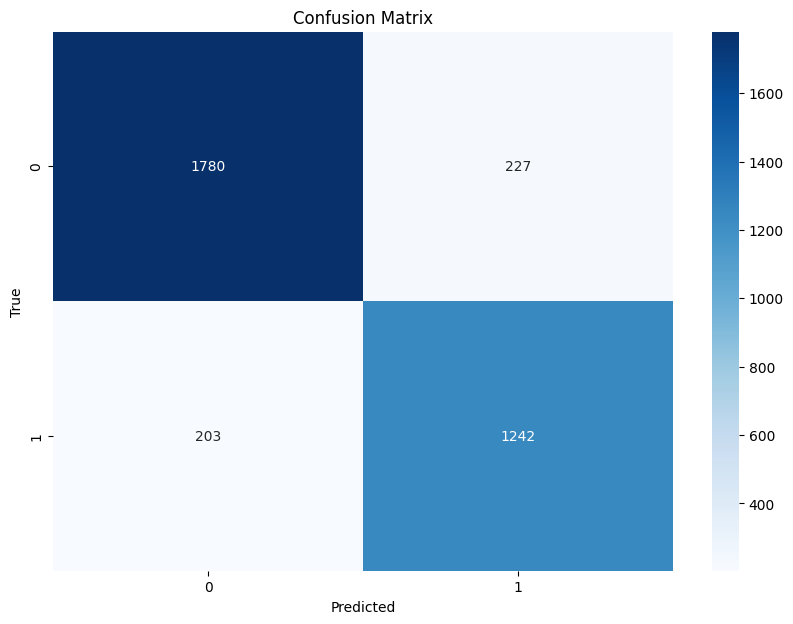

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle
from google.colab import files

# Save the tokenizer
with open('tokenizer_nbf.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

# Save the Naive Bayes model
with open('nb_tfidf_model.pkl', 'wb') as file:
    pickle.dump(optimal_model, file)

# Download files
files.download('tokenizer_nbf.pkl')
files.download('nb_tfidf_model.pkl')

NameError: name 'tokenizer' is not defined

## Train Model SVM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
# Vektorisasi teks menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(texts)
y = labels

In [ ]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Mengurangi dimensi fitur menggunakan PCA
pca = PCA(n_components=100)  # Sesuaikan jumlah komponen
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [ ]:
# Menggunakan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribusi label sebelum SMOTE: {pd.Series(y_train).value_counts()}")
print(f"Distribusi label setelah SMOTE: {pd.Series(y_train_smote).value_counts()}")

Distribusi label sebelum SMOTE: label
0    8025
1    5780
Name: count, dtype: int64
Distribusi label setelah SMOTE: label
0    8025
1    8025
Name: count, dtype: int64


In [ ]:
# Konversi matriks sparse ke dense
X_train_smote_dense = X_train_smote.toarray()
X_test_dense = X_test.toarray()

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_smote_dense = scaler.fit_transform(X_train_smote_dense)

# Transform the test data
X_test_dense = scaler.transform(X_test_dense)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
# Definisikan ruang pencarian untuk hyperparameters
param_distributions = {
    'C': uniform(0.1, 10)
}

# Inisialisasi model SVM dengan kernel linear
model = LinearSVC(random_state=42)

In [ ]:
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=42)

# Fit model dengan RandomizedSearchCV
random_search.fit(X_train_smote_dense, y_train_smote)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LinearSVC(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dfb935700d0>},
                   random_state=42, scoring='accuracy')

In [ ]:
# Parameter terbaik
print(f"Best parameters found: {random_search.best_params_}")

# Model terbaik
best_model = random_search.best_estimator_

Best parameters found: {'C': 0.155221171236024}


SVM - Accuracy: 0.8583
SVM - Precision: 0.8265
SVM - Recall: 0.8374
SVM - F1 Score: 0.8319
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2007
           1       0.83      0.84      0.83      1445

    accuracy                           0.86      3452
   macro avg       0.85      0.86      0.85      3452
weighted avg       0.86      0.86      0.86      3452



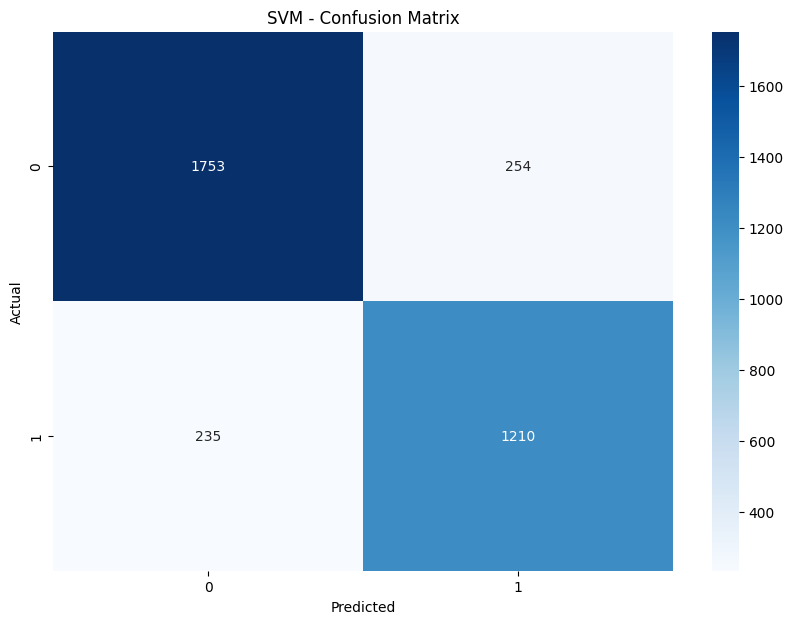

In [ ]:
# Evaluate the best model
y_pred_svm = best_model.predict(X_test_dense) # Use best_model instead of best_svm_model

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f'SVM - Accuracy: {accuracy_svm:.4f}')
print(f'SVM - Precision: {precision_svm:.4f}')
print(f'SVM - Recall: {recall_svm:.4f}')
print(f'SVM - F1 Score: {f1_svm:.4f}')
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

In [ ]:
with open('svm_model_random_search.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Download files
files.download('svm_model_random_search.pkl')

# Training RNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(texts)
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribusi label sebelum SMOTE: {pd.Series(y_train).value_counts()}")
print(f"Distribusi label setelah SMOTE: {pd.Series(y_train_smote).value_counts()}")

Distribusi label sebelum SMOTE: label
0    8025
1    5780
Name: count, dtype: int64
Distribusi label setelah SMOTE: label
0    8025
1    8025
Name: count, dtype: int64


In [ ]:
X_train_smote_dense = X_train_smote.toarray()
X_test_dense = X_test.toarray()

In [ ]:
scaler = MinMaxScaler()
X_train_smote_dense = scaler.fit_transform(X_train_smote_dense)
X_test_dense = scaler.transform(X_test_dense)

X_train_reshaped = np.reshape(X_train_smote_dense, (X_train_smote_dense.shape[0], 1, X_train_smote_dense.shape[1]))
X_test_reshaped = np.reshape(X_test_dense, (X_test_dense.shape[0], 1, X_test_dense.shape[1]))

In [ ]:
# model = Sequential()
# model.add(SimpleRNN(units=128, input_shape=(1, X_train_smote_dense.shape[1]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units=64, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Membangun model dengan regularisasi
model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(1, X_train_smote_dense.shape[1]), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(SimpleRNN(units=64, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menambahkan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Melatih model dengan early stopping
history = model.fit(X_train_reshaped, y_train_smote, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6159 - loss: 1.5434 - val_accuracy: 0.6380 - val_loss: 0.7992
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8326 - loss: 0.6321 - val_accuracy: 0.7626 - val_loss: 0.6467
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8375 - loss: 0.5821 - val_accuracy: 0.8143 - val_loss: 0.5832
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8560 - loss: 0.5485 - val_accuracy: 0.7215 - val_loss: 0.6516
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8562 - loss: 0.5326 - val_accuracy: 0.7555 - val_loss: 0.6045
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8629 - loss: 0.5234 - val_accuracy: 0.7000 - val_loss: 0.6691


108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN - Accuracy: 0.8424
RNN - Precision: 0.8079
RNN - Recall: 0.8180
RNN - F1 Score: 0.8129
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2007
           1       0.81      0.82      0.81      1445

    accuracy                           0.84      3452
   macro avg       0.84      0.84      0.84      3452
weighted avg       0.84      0.84      0.84      3452



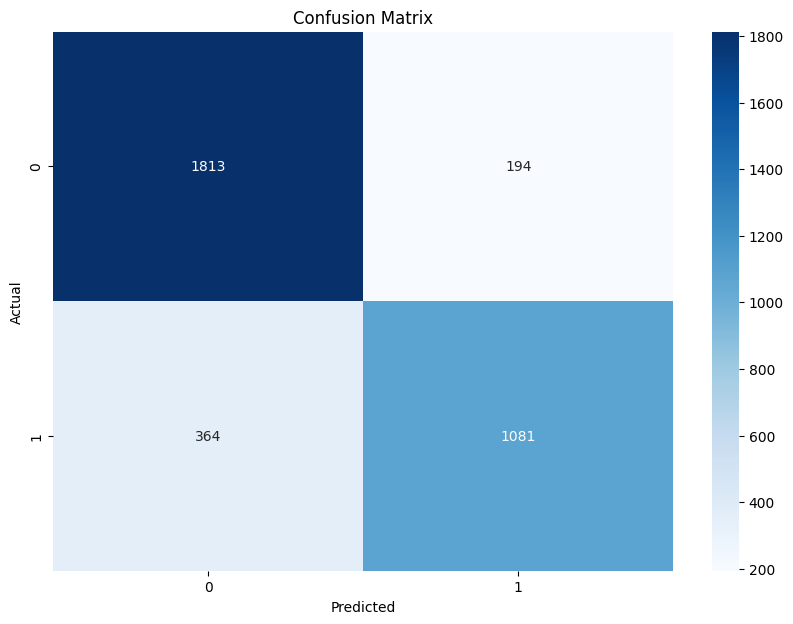

In [ ]:
y_pred_rnn = (model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
precision_rnn = precision_score(y_test, y_pred_rnn)
recall_rnn = recall_score(y_test, y_pred_rnn)
f1_rnn = f1_score(y_test, y_pred_rnn)

print(f'RNN - Accuracy: {accuracy_rnn:.4f}')
print(f'RNN - Precision: {precision_rnn:.4f}')
print(f'RNN - Recall: {recall_rnn:.4f}')
print(f'RNN - F1 Score: {f1_rnn:.4f}')
print(classification_report(y_test, y_pred_rnn))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(0, 0.5, 'Loss')

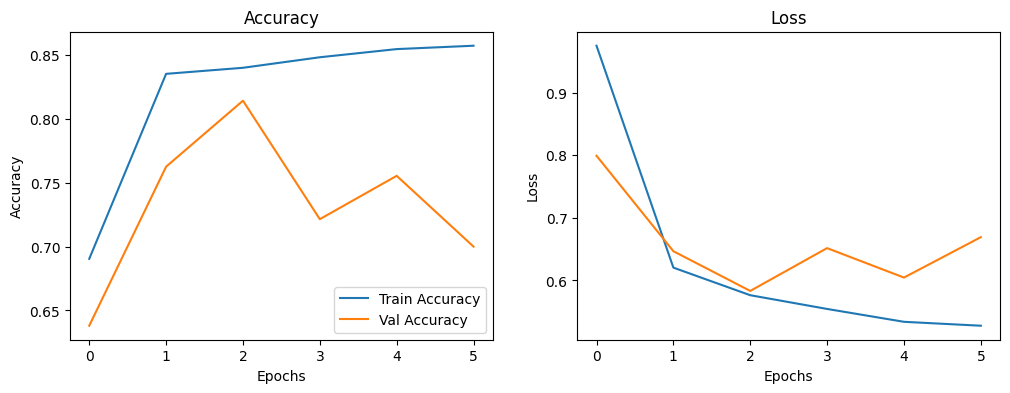

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
from google.colab import files

# Save the model
model.save('tfidf_rnn_model.h5')

files.download('tfidf_rnn_model.h5')

## Train Model LSTM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
# Vektorisasi teks menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(texts)
y = labels

In [ ]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Menggunakan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribusi label sebelum SMOTE: {pd.Series(y_train).value_counts()}")
print(f"Distribusi label setelah SMOTE: {pd.Series(y_train_smote).value_counts()}")

Distribusi label sebelum SMOTE: label
0    8025
1    5780
Name: count, dtype: int64
Distribusi label setelah SMOTE: label
0    8025
1    8025
Name: count, dtype: int64


In [ ]:
# Konversi matriks sparse ke dense
X_train_smote_dense = X_train_smote.toarray()
X_test_dense = X_test.toarray()

In [ ]:
# Reshape data untuk LSTM
X_train_reshaped = np.reshape(X_train_smote_dense, (X_train_smote_dense.shape[0], 1, X_train_smote_dense.shape[1]))
X_test_reshaped = np.reshape(X_test_dense, (X_test_dense.shape[0], 1, X_test_dense.shape[1]))

In [ ]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=128, input_shape=(1, X_train_smote_dense.shape[1]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train_reshaped, y_train_smote, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6909 - loss: 0.5441 - val_accuracy: 0.8165 - val_loss: 0.3595
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8983 - loss: 0.2472 - val_accuracy: 0.9168 - val_loss: 0.2772
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9117 - loss: 0.2198 - val_accuracy: 0.8938 - val_loss: 0.3036
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9204 - loss: 0.2036 - val_accuracy: 0.8259 - val_loss: 0.3494
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9217 - loss: 0.1770 - val_accuracy: 0.8439 - val_loss: 0.3205
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9216 - loss: 0.1637 - val_accuracy: 0.7950 - val_loss: 0.3475
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9251 - loss: 0.1540 - val_accuracy: 0.7928 - val_loss: 0.3638
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9352 - loss: 0.1309 - va

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
LSTM - Accuracy: 0.8384
LSTM - Precision: 0.8478
LSTM - Recall: 0.7481
LSTM - F1 Score: 0.7949
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2007
           1       0.85      0.75      0.79      1445

    accuracy                           0.84      3452
   macro avg       0.84      0.83      0.83      3452
weighted avg       0.84      0.84      0.84      3452



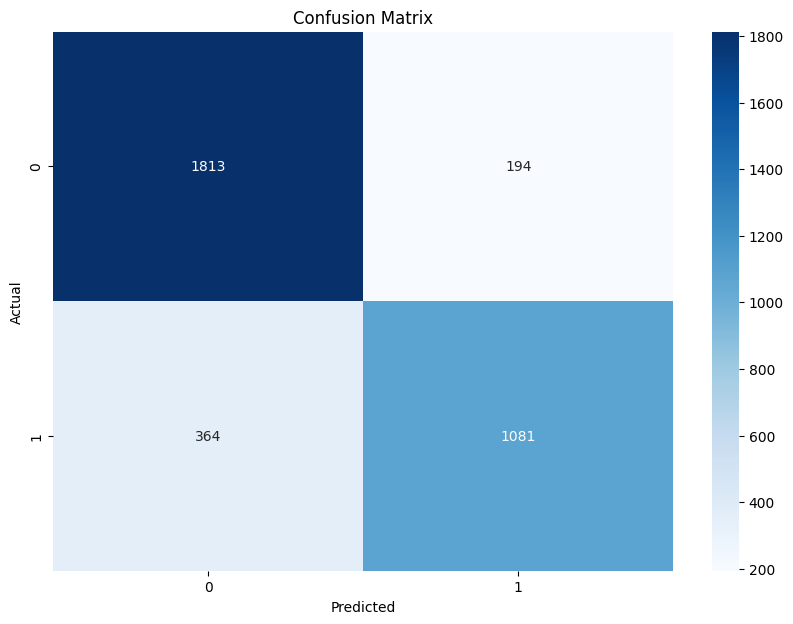

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Replace 'y_test_final' with the correct variable name for your test labels
accuracy_lstm = accuracy_score(y_test, y_pred)  # Assuming 'y_test' is the correct variable
precision_lstm = precision_score(y_test, y_pred)
recall_lstm = recall_score(y_test, y_pred)
f1_lstm = f1_score(y_test, y_pred)

print(f'LSTM - Accuracy: {accuracy_lstm:.4f}')
print(f'LSTM - Precision: {precision_lstm:.4f}')
print(f'LSTM - Recall: {recall_lstm:.4f}')
print(f'LSTM - F1 Score: {f1_lstm:.4f}')
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

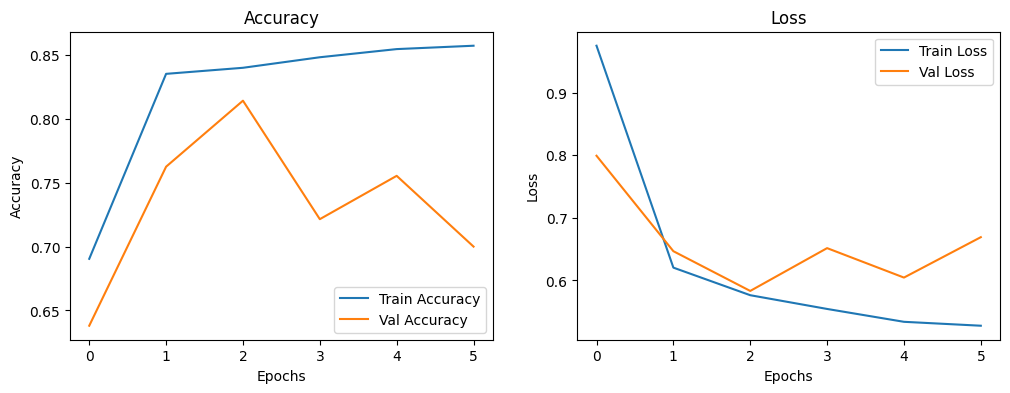

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from google.colab import files

# Menyimpan model sebagai file .h5
model.save('optimal_model.h5')

# Mengunduh model .h5
files.download('optimal_model.h5')

# Veektorisasi Glove

# Glove Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform input size
max_length = max([len(seq) for seq in sequences])
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
# Download file dari Google Drive
!gdown --id 1Odep8l3sApz_myc5vJhEXFhJj1zihHu6 -O /content/glove.6B.100d.txt

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Odep8l3sApz_myc5vJhEXFhJj1zihHu6
From (redirected): https://drive.google.com/uc?id=1Odep8l3sApz_myc5vJhEXFhJj1zihHu6&confirm=t&uuid=3ecabee1-6cd6-4c54-a637-8aa95fbbd032
To: /content/glove.6B.100d.txt
100% 347M/347M [00:08<00:00, 38.7MB/s]


In [ ]:
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefficients = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefficients
    return embeddings_index

embeddings_index = load_glove_embeddings('glove.6B.100d.txt')

In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
def text_to_glove_vectors(texts, tokenizer, embedding_matrix, max_length):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    glove_vectors = np.array([np.mean(embedding_matrix[seq], axis=0) for seq in padded_sequences if len(seq) > 0])
    return glove_vectors

X_glove = text_to_glove_vectors(texts, tokenizer, embedding_matrix, max_length)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_glove, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribusi label sebelum SMOTE: {pd.Series(y_train).value_counts()}")
print(f"Distribusi label setelah SMOTE: {pd.Series(y_train_smote).value_counts()}")

Distribusi label sebelum SMOTE: label
0    8025
1    5780
Name: count, dtype: int64
Distribusi label setelah SMOTE: label
0    8025
1    8025
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and estimator
print(f"Best parameters: {grid_search.best_params_}")
best_lr = grid_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'C': 10}


Logistic Regression - Accuracy: 0.6883
Logistic Regression - Precision: 0.6241
Logistic Regression - Recall: 0.6422
Logistic Regression - F1 Score: 0.6330
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2007
           1       0.62      0.64      0.63      1445

    accuracy                           0.69      3452
   macro avg       0.68      0.68      0.68      3452
weighted avg       0.69      0.69      0.69      3452



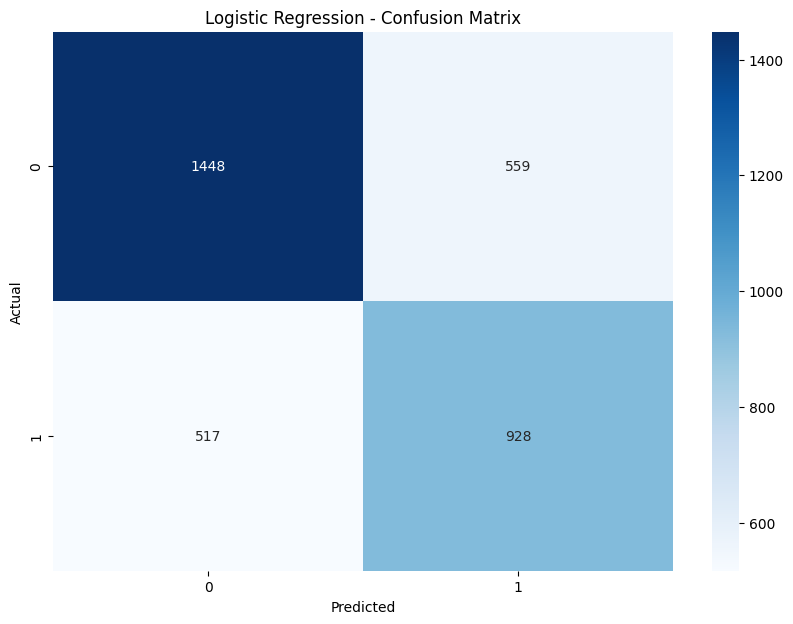

In [ ]:
# Evaluate the best model
y_pred_lr = best_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Logistic Regression - Accuracy: {accuracy_lr:.4f}')  # Update the print statements
print(f'Logistic Regression - Precision: {precision_lr:.4f}')
print(f'Logistic Regression - Recall: {recall_lr:.4f}')
print(f'Logistic Regression - F1 Score: {f1_lr:.4f}')
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)  # Update variable name
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')  # Update title
plt.show()


In [ ]:
from google.colab import files

# Assuming 'model' is your tokenizer, rename it
tokenizer = model

# Save the tokenizer
with open('tokenizer_nb_glove.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

# Save the nb glove model
with open('nb_glove_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)  # Make sure 'best_model' is defined

# Download files
files.download('tokenizer_nb_glove.pkl')
files.download('nb_glove_model.pkl_model.pkl')

# Glove SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
# Pad sequences to ensure uniform input size
max_length = max([len(seq) for seq in sequences])
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefficients = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefficients
    return embeddings_index

embeddings_index = load_glove_embeddings('glove.6B.100d.txt')

In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

In [ ]:
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
def text_to_glove_vectors(texts, tokenizer, embedding_matrix, max_length):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    glove_vectors = np.array([np.mean(embedding_matrix[seq], axis=0) for seq in padded_sequences if len(seq) > 0])
    return glove_vectors

In [ ]:
X_glove = text_to_glove_vectors(texts, tokenizer, embedding_matrix, max_length)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_glove, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
# Menggunakan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribusi label sebelum SMOTE: {pd.Series(y_train).value_counts()}")
print(f"Distribusi label setelah SMOTE: {pd.Series(y_train_smote).value_counts()}")

Distribusi label sebelum SMOTE: label
0    8025
1    5780
Name: count, dtype: int64
Distribusi label setelah SMOTE: label
0    8025
1    8025
Name: count, dtype: int64


In [ ]:
# Apply PCA
pca = PCA(n_components=100)  # Adjust number of components as needed
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

In [ ]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_smote_dense = scaler.fit_transform(X_train_smote_pca)

# Transform the test data
X_test_dense = scaler.transform(X_test_pca)

In [ ]:
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize SVM model with linear kernel
svm_classifier = SVC()

In [ ]:
# Inisialisasi GridSearchCV untuk SVM
from sklearn.model_selection import GridSearchCV

In [ ]:
# Inisialisasi GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit model dengan GridSearchCV
grid_search_svm.fit(X_train_smote_dense, y_train_smote) # Use the correct GridSearchCV object for the SVM model.

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
 # Parameter terbaik
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

# Model terbaik
best_svm_model = grid_search_svm.best_estimator_

Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


SVM - Accuracy: 0.7743
SVM - Precision: 0.7303
SVM - Recall: 0.7308
SVM - F1 Score: 0.7305
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2007
           1       0.73      0.73      0.73      1445

    accuracy                           0.77      3452
   macro avg       0.77      0.77      0.77      3452
weighted avg       0.77      0.77      0.77      3452



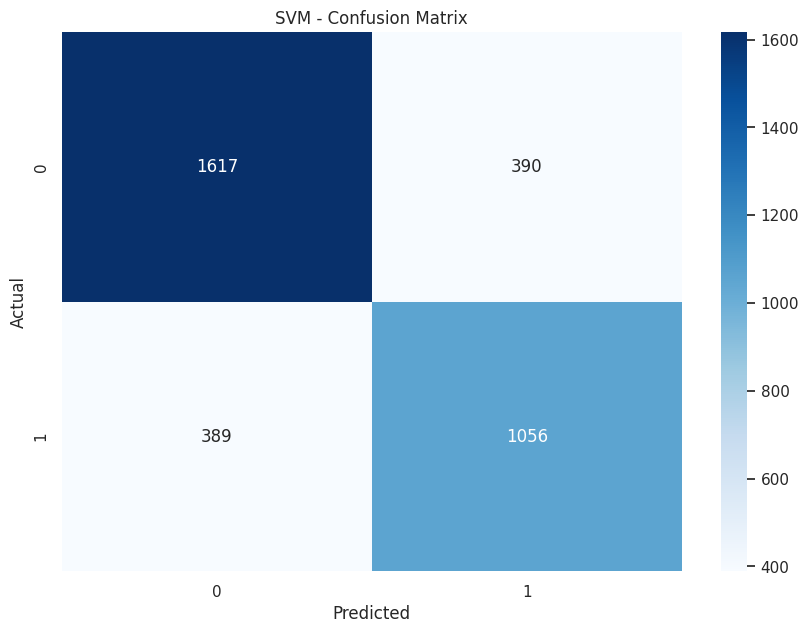

In [ ]:
# Evaluate the best model
y_pred_svm = best_svm_model.predict(X_test_dense)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f'SVM - Accuracy: {accuracy_svm:.4f}')
print(f'SVM - Precision: {precision_svm:.4f}')
print(f'SVM - Recall: {recall_svm:.4f}')
print(f'SVM - F1 Score: {f1_svm:.4f}')
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
# Save the SVM model
with open('svm_glove_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

# Download files
files.download('svm_glove_model.pkl')
files.download('tokenizer.pkl')

# RNN Gloves

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional, SimpleRNN
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform input size
max_length = max([len(seq) for seq in sequences])
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefficients = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefficients
    return embeddings_index

embeddings_index = load_glove_embeddings('glove.6B.100d.txt')

In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(Bidirectional(LSTM(units=256, return_sequences=True, kernel_regularizer='l2')))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=128, return_sequences=True, kernel_regularizer='l2')))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=128, return_sequences=True, kernel_regularizer='l2')))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=64, kernel_regularizer='l2')))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 27, 100)           1979700   
                                                                 
 bidirectional_14 (Bidirect  (None, 27, 512)           731136    
 ional)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 27, 512)           0         
                                                                 
 bidirectional_15 (Bidirect  (None, 27, 256)           656384    
 ional)                                                          
                                                                 
 dropout_22 (Dropout)        (None, 27, 256)           0         
                                                                 
 bidirectional_16 (Bidirect  (None, 27, 256)          

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
346/346 [==============================] - 20s 26ms/step - loss: 2.6175 - accuracy: 0.6809 - val_loss: 0.6783 - val_accuracy: 0.6769
Epoch 2/50
346/346 [==============================] - 7s 20ms/step - loss: 0.6846 - accuracy: 0.6827 - val_loss: 0.6594 - val_accuracy: 0.6972
Epoch 3/50
346/346 [==============================] - 6s 19ms/step - loss: 0.6402 - accuracy: 0.7036 - val_loss: 0.6327 - val_accuracy: 0.6968
Epoch 4/50
346/346 [==============================] - 7s 20ms/step - loss: 0.6368 - accuracy: 0.7085 - val_loss: 0.6522 - val_accuracy: 0.7016
Epoch 5/50
346/346 [==============================] - 7s 19ms/step - loss: 0.6294 - accuracy: 0.7121 - val_loss: 0.6542 - val_accuracy: 0.7077
Epoch 6/50
346/346 [==============================] - 7s 20ms/step - loss: 0.6695 - accuracy: 0.7170 - val_loss: 0.7205 - val_accuracy: 0.6983


In [ ]:
y_pred_rnn = (model.predict(X_test) > 0.5).astype("int32") # Use 'model' instead of 'rnn_model'
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
precision_rnn = precision_score(y_test, y_pred_rnn)
recall_rnn = recall_score(y_test, y_pred_rnn)
f1_rnn = f1_score(y_test, y_pred_rnn)

print(f'RNN - Accuracy: {accuracy_rnn:.4f}')
print(f'RNN - Precision: {precision_rnn:.4f}')
print(f'RNN - Recall: {recall_rnn:.4f}')
print(f'RNN - F1 Score: {f1_rnn:.4f}')
print(classification_report(y_test, y_pred_rnn))

108/108 [==============================] - 3s 7ms/step
RNN - Accuracy: 0.7071
RNN - Precision: 0.8308
RNN - Recall: 0.3772
RNN - F1 Score: 0.5188
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      2007
           1       0.83      0.38      0.52      1445

    accuracy                           0.71      3452
   macro avg       0.75      0.66      0.65      3452
weighted avg       0.74      0.71      0.68      3452



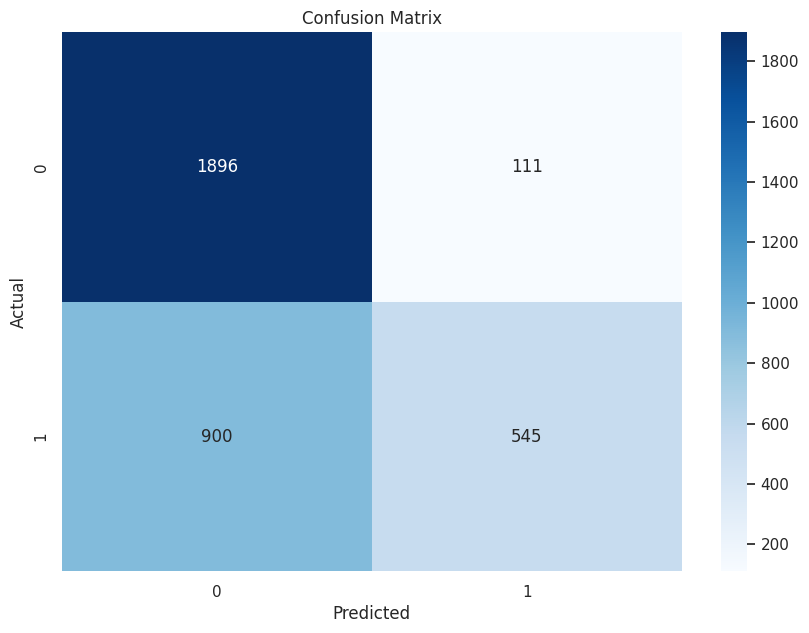

In [ ]:
cm = confusion_matrix(y_test, y_pred_rnn)  # instead of y_pred

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

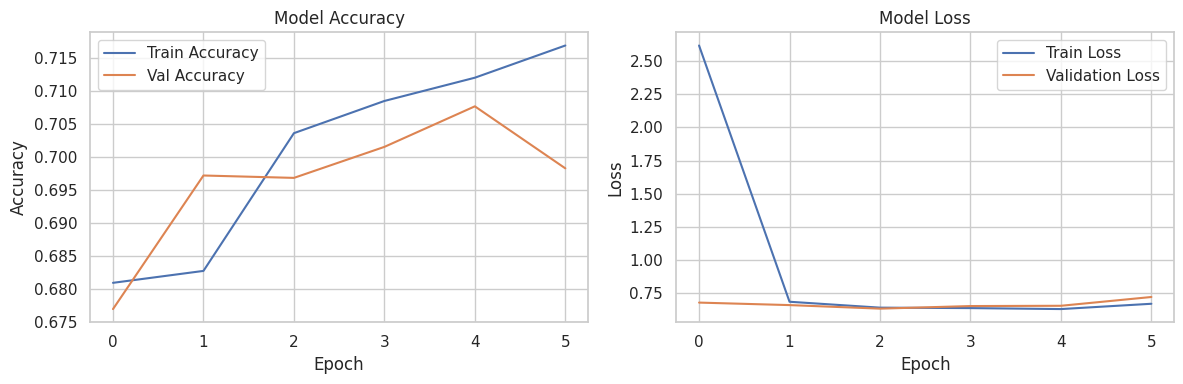

In [ ]:
# Ensure correct plotting of accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

# Save the RNN model
model.save('rnn_model.h5')

# Download files
files.download('tokenizer.pkl')
files.download('rnn_model.h5')

# LSTM GLOVES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Plotting style
sns.set(style="whitegrid")

In [ ]:
texts = df_combined['clean_review']
labels = df_combined['label']

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_length = max([len(seq) for seq in sequences])
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
y = np.array(labels)

In [ ]:
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefficients = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefficients
    return embeddings_index

embeddings_index = load_glove_embeddings('glove.6B.100d.txt')

# Create embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []
history_list = []

for train_index, val_index in kf.split(X_padded):
    # Split data into training and validation sets for the current fold
    X_train, X_val = X_padded[train_index], X_padded[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
        Bidirectional(LSTM(units=128, return_sequences=True)),
        Dropout(0.5),
        Bidirectional(LSTM(units=64)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
    history_list.append(history)

Epoch 1/50
432/432 [==============================] - 94s 200ms/step - loss: 0.5360 - accuracy: 0.7273 - val_loss: 0.4906 - val_accuracy: 0.7656
Epoch 2/50
432/432 [==============================] - 84s 195ms/step - loss: 0.4683 - accuracy: 0.7741 - val_loss: 0.4493 - val_accuracy: 0.7795
Epoch 3/50
432/432 [==============================] - 80s 185ms/step - loss: 0.4220 - accuracy: 0.7993 - val_loss: 0.4243 - val_accuracy: 0.7992
Epoch 4/50
432/432 [==============================] - 79s 183ms/step - loss: 0.3907 - accuracy: 0.8216 - val_loss: 0.4081 - val_accuracy: 0.8184
Epoch 5/50
432/432 [==============================] - 86s 199ms/step - loss: 0.3499 - accuracy: 0.8414 - val_loss: 0.4176 - val_accuracy: 0.8074
Epoch 6/50
432/432 [==============================] - 79s 184ms/step - loss: 0.3250 - accuracy: 0.8560 - val_loss: 0.4242 - val_accuracy: 0.8126
Epoch 7/50
432/432 [==============================] - 86s 199ms/step - loss: 0.2950 - accuracy: 0.8705 - val_loss: 0.4293 - val_ac

In [ ]:
# Split data into train and test sets for final evaluation
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
# Assuming 'model' from the previous code block is your LSTM model
lstm_model = model

In [ ]:
# Predict on test set
y_pred_lstm = (lstm_model.predict(X_test_final) > 0.5).astype("int32") # Use X_test_final as defined earlier
accuracy_lstm = accuracy_score(y_test_final, y_pred_lstm) # Use y_test_final
precision_lstm = precision_score(y_test_final, y_pred_lstm)
recall_lstm = recall_score(y_test_final, y_pred_lstm)
f1_lstm = f1_score(y_test_final, y_pred_lstm)

# Display results
print(f'LSTM - Accuracy: {accuracy_lstm:.4f}')
print(f'LSTM - Precision: {precision_lstm:.4f}')
print(f'LSTM - Recall: {recall_lstm:.4f}')
print(f'LSTM - F1 Score: {f1_lstm:.4f}')
print(classification_report(y_test_final, y_pred_lstm))

108/108 [==============================] - 7s 45ms/step
LSTM - Accuracy: 0.8754
LSTM - Precision: 0.9172
LSTM - Recall: 0.7680
LSTM - F1 Score: 0.8360
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2025
           1       0.92      0.77      0.84      1427

    accuracy                           0.88      3452
   macro avg       0.89      0.86      0.87      3452
weighted avg       0.88      0.88      0.87      3452



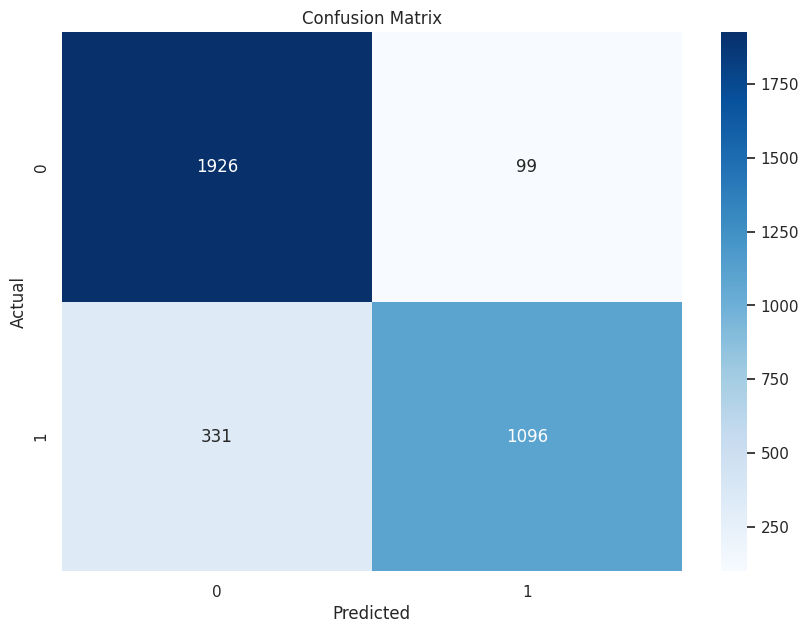

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Call function to plot the confusion matrix
plot_confusion_matrix(y_test_final, y_pred_lstm)

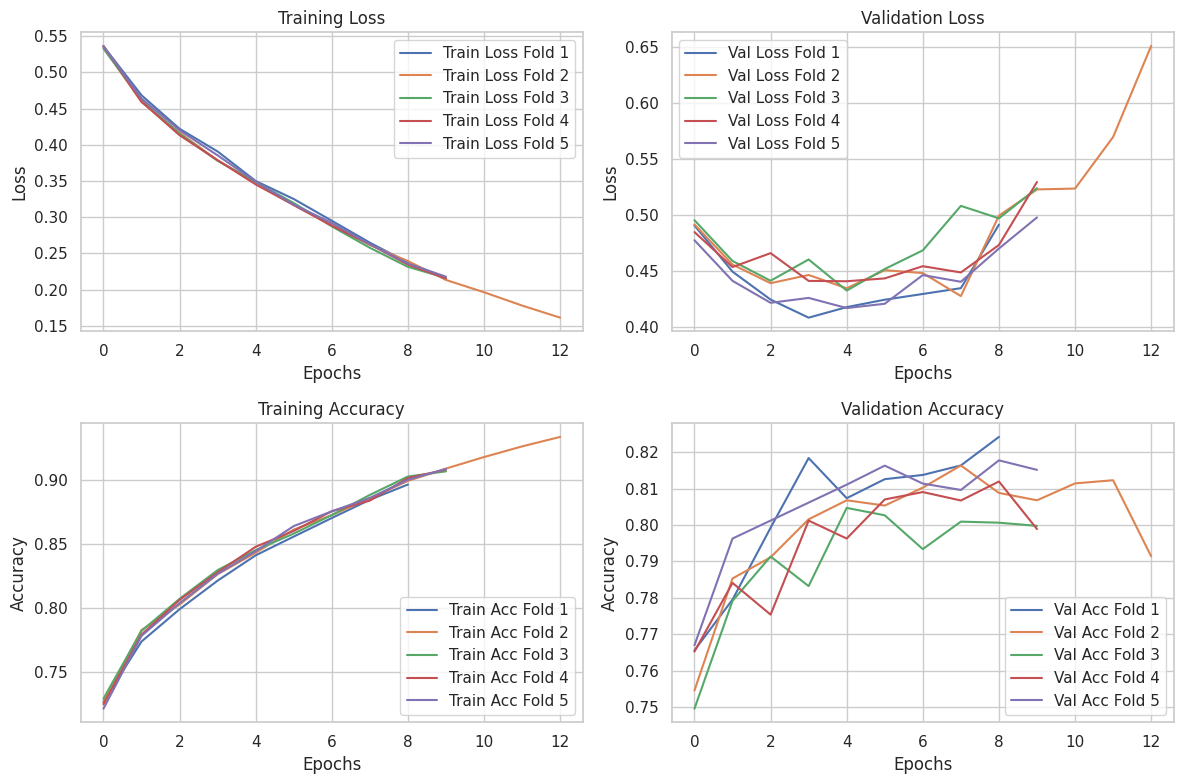

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 8))
for i, history in enumerate(history_list):
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label=f'Train Loss Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['val_loss'], label=f'Val Loss Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label=f'Train Acc Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_accuracy'], label=f'Val Acc Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Save the tokenizer
with open('tokenizer_glstm.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

# Save the RNN model
model.save('lstm_model.h5')

# Download files
files.download('tokenizer_glstm.pkl')
files.download('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deteksi berita

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

# Load tokenizer
with open('tokenizer_glstm.pkl', 'rb') as file:  # Change to 'rb' for read-binary mode
    tokenizer = pickle.load(file)

# Load RNN model
model = load_model('lstm_model.h5')  # Load from the correct file name

In [ ]:
def preprocess_text(text, tokenizer, max_length=100):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences

In [ ]:
def detect_hoax(news_title, model, tokenizer, max_length):
    padded_sequences = preprocess_text(news_title, tokenizer, max_length)

    # Prediksi menggunakan model
    prediction = (model.predict(padded_sequences) > 0.5).astype("int32")

    # Output hasil prediksi
    if prediction[0][0] == 1:
        return "Hoax"
    else:
        return "Not Hoax"

In [ ]:
def main():
    news_title = input("Masukkan judul berita: ")
    max_length = 27 # Set a default value for max_length
    result = detect_hoax(news_title, model, tokenizer, max_length)
    print(f"Judul berita: {news_title}\nDeteksi: {result}")

if __name__ == "__main__":
    main()

## Vektorisasi IndoBERT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
# Load tokenizer dan model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
# Fungsi untuk mendapatkan embedding BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

In [ ]:
# Dapatkan embedding untuk seluruh data
embeddings = np.vstack(df_combined['clean_review'].apply(get_bert_embeddings).values)

In [ ]:
# Split data menjadi data latih dan uji
X = embeddings
y = df_combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

## Naive Bayes Bert

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

In [ ]:
# Inisialisasi model Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [ ]:
# Definisikan ruang pencarian untuk hyperparameters
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

# Inisialisasi GridSearchCV untuk Naive Bayes
grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit model dengan GridSearchCV
grid_search_nb.fit(X_train_scaled, y_train_smote)

# Parameter terbaik
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters for Naive Bayes: {'alpha': 0.5}


In [ ]:
# Model terbaik
best_nb_model = grid_search_nb.best_estimator_

# Evaluasi model terbaik (Naive Bayes)
y_pred_nb = best_nb_model.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f'Naive Bayes - Accuracy: {accuracy_nb:.4f}')
print(f'Naive Bayes - Precision: {precision_nb:.4f}')
print(f'Naive Bayes - Recall: {recall_nb:.4f}')
print(f'Naive Bayes - F1 Score: {f1_nb:.4f}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes - Accuracy: 0.7019
Naive Bayes - Precision: 0.6434
Naive Bayes - Recall: 0.6457
Naive Bayes - F1 Score: 0.6446
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2007
           1       0.64      0.65      0.64      1445

    accuracy                           0.70      3452
   macro avg       0.69      0.69      0.69      3452
weighted avg       0.70      0.70      0.70      3452



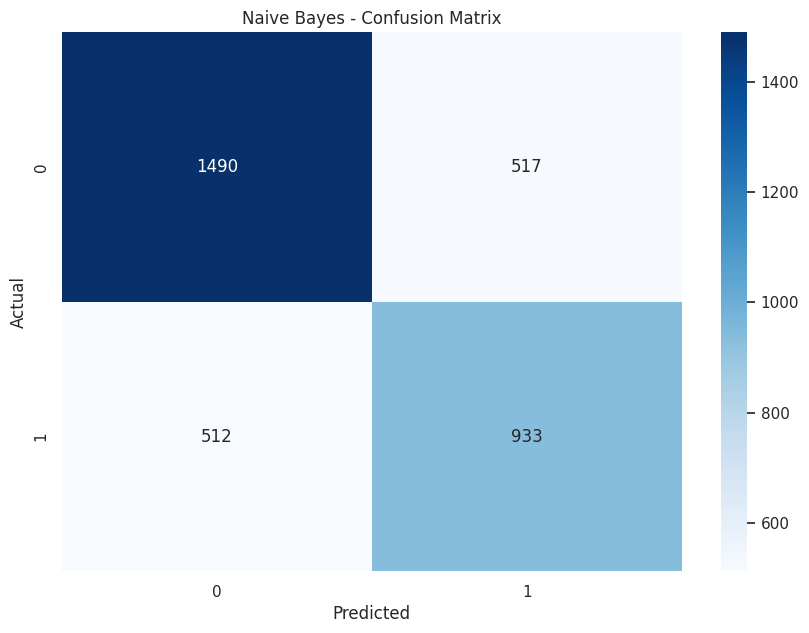

In [ ]:
# Membuat confusion matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

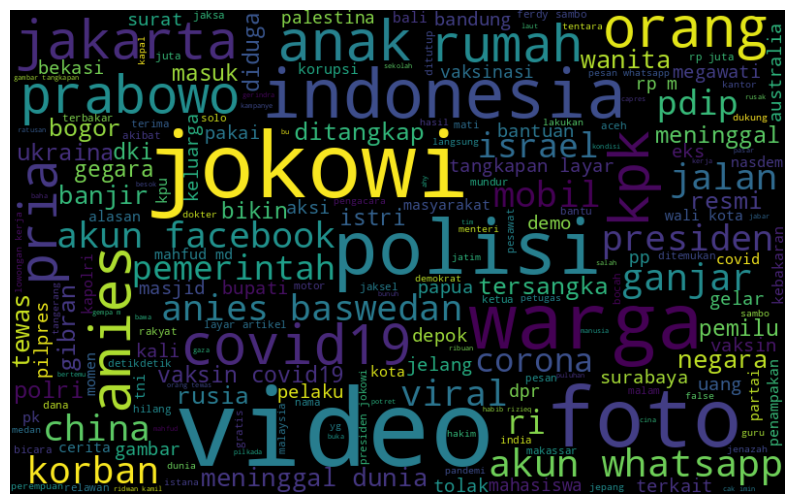

In [ ]:
#WordCloud
all_words = ' '.join([text for text in df_combined['clean_review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(best_nb_model, file)

# Download files
files.download('naive_bayes_model.pkl')

#  SVM Bert

In [ ]:
# Split data menjadi data latih dan uji
X = embeddings
y = df_combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Definisikan ruang pencarian untuk hyperparameters
param_grid_svm = {
    'C': [0.1, 1, 10, 100]
}
# Inisialisasi model SVM dengan kernel linear
svm_classifier = SVC(kernel='linear', probability=True)

In [ ]:
# Inisialisasi GridSearchCV untuk SVM
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit model dengan GridSearchCV
grid_search_svm.fit(X_train_scaled, y_train_smote)

# Parameter terbaik
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for SVM: {'C': 10}


In [ ]:
# Model terbaik
best_svm_model = grid_search_svm.best_estimator_

In [ ]:
# Evaluasi model terbaik (SVM)
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f'SVM - Accuracy: {accuracy_svm:.4f}')
print(f'SVM - Precision: {precision_svm:.4f}')
print(f'SVM - Recall: {recall_svm:.4f}')
print(f'SVM - F1 Score: {f1_svm:.4f}')
print(classification_report(y_test, y_pred_svm))

In [ ]:
# Membuat confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

In [ ]:
# Save the SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)

# Download files
files.download('svm_model.pkl')

# LSTM BERT

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import re
import string
import time

In [ ]:
# Fungsi untuk mendapatkan embedding BERT dengan batch processing
def get_bert_embeddings(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

In [ ]:
# Dapatkan embedding untuk seluruh data dengan batch processing
texts = df_combined['clean_review'].tolist()
start_time = time.time()
embeddings = get_bert_embeddings(texts)
end_time = time.time()
print(f"Time taken for BERT embedding: {end_time - start_time} seconds")

In [ ]:
# Split data menjadi data latih dan uji
X = embeddings
y = df_combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Bentuk ulang data untuk LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Inisialisasi model LSTM
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(units=256, return_sequences=True), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Bidirectional(LSTM(units=64)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Latih model LSTM
history = lstm_model.fit(X_train_lstm, y_train_smote, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test))

In [ ]:
# Evaluasi model LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

print(f'LSTM - Accuracy: {accuracy_lstm:.4f}')
print(f'LSTM - Precision: {precision_lstm:.4f}')
print(f'LSTM - Recall: {recall_lstm:.4f}')
print(f'LSTM - F1 Score: {f1_lstm:.4f}')
print(classification_report(y_test, y_pred_lstm))

In [ ]:
# Membuat confusion matrix untuk LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM - Confusion Matrix')
plt.show()

In [ ]:
# Save the LSTM model
lstm_model.save('lstm_model.h5')

# Download files
files.download('lstm_model.h5')

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## RNN Bert

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Bidirectional

In [ ]:
# Fungsi untuk mendapatkan embedding BERT dengan batch processing
def get_bert_embeddings(texts, batch_size=16):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

In [ ]:
# Dapatkan embedding untuk seluruh data dengan batch processing
texts = df_combined['clean_review'].tolist()
start_time = time.time()
embeddings = get_bert_embeddings(texts)
end_time = time.time()
print(f"Time taken for BERT embedding: {end_time - start_time} seconds")

In [ ]:
# Split data menjadi data latih dan uji
X = embeddings
y = df_combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Bentuk ulang data untuk RNN
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Inisialisasi model RNN
rnn_model = Sequential()
rnn_model.add(Bidirectional(SimpleRNN(units=128, return_sequences=True), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dropout(0.5))
rnn_model.add(Bidirectional(SimpleRNN(units=64)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Latih model RNN
history = rnn_model.fit(X_train_rnn, y_train_smote, epochs=20, batch_size=64, validation_data=(X_test_rnn, y_test))

In [ ]:
# Evaluasi model RNN
y_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype("int32")
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
precision_rnn = precision_score(y_test, y_pred_rnn)
recall_rnn = recall_score(y_test, y_pred_rnn)
f1_rnn = f1_score(y_test, y_pred_rnn)

print(f'RNN - Accuracy: {accuracy_rnn:.4f}')
print(f'RNN - Precision: {precision_rnn:.4f}')
print(f'RNN - Recall: {recall_rnn:.4f}')
print(f'RNN - F1 Score: {f1_rnn:.4f}')
print(classification_report(y_test, y_pred_rnn))

# Membuat confusion matrix untuk RNN
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RNN - Confusion Matrix')
plt.show()

In [ ]:
# Save the RNN model
rnn_model.save('rnn_model.h5')

# Download files
files.download('rnn_model.h5')

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()